<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/PMdarimaexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.6MB/s 
     |████████████████████████████████| 9.5MB 22.7MB/s 
     |████████████████████████████████| 2.1MB 59.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [13]:
import pmdarima as pm
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcce.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['e'] = dfa['e']
df['e'] = pd.to_numeric(df['e'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

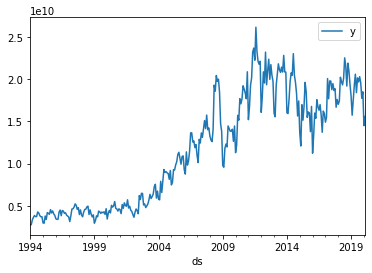

In [40]:
df.plot()

In [41]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.4284342544302224, True)

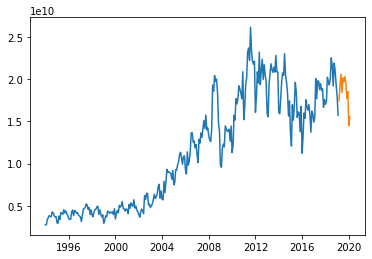

In [42]:
train = df.iloc[:-12].copy()  
test =  df.iloc[-12:].copy() 
plt.plot(train) 
plt.plot(test)

In [43]:
model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_q=5, max_d=5, start_P=0, D=1, start_Q=0, max_P=5, 
                      max_Q=5, max_D=5, seasonal= True, m= 12, error_action = 'warn', trace = True, supress_warnings=True, stepwise=True, 
                      random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13044.050, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=12958.537, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=12916.511, Time=0.31 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=12996.274, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=12917.286, Time=0.48 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=12917.233, Time=0.89 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=12952.264, Time=0.23 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=12919.233, Time=2.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=12950.250, Time=0.16 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=12917.878, Time=0.44 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=12919.007, Time=0.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=12921.121, Time=0.26 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=12920.905, Time=0.76 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=12918.493, Time=0.36 sec

Best

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  302
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -6455.256
Date:                            Tue, 02 Feb 2021   AIC                          12916.511
Time:                                    19:06:33   BIC                          12927.511
Sample:                                         0   HQIC                         12920.919
                                            - 302                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3923      0.060     -6.544      0.000      -0.510      -0.275
ma.S.L12      -0.7257      0.054    -13.456      0.000      -0.831      -0.620
sigma2      1.978e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                60.49
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              11.06   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+54. Standard errors may be unstable.
"""

In [45]:
prediction = pd.DataFrame(model.predict(n_periods = 12), index = test.index)
prediction

,0
ds,
2019-03-01,1.998883e+10
2019-04-01,1.929164e+10
2019-05-01,2.059991e+10
2019-06-01,2.081638e+10
2019-07-01,2.135732e+10
2019-08-01,2.104644e+10
2019-09-01,1.983578e+10
2019-10-01,2.034310e+10
2019-11-01,1.929775e+10


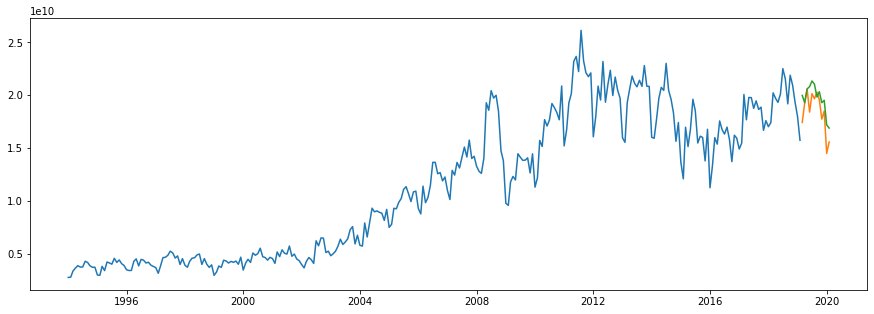

In [46]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test, label= 'Test')
plt.plot(prediction, label = 'Previsão')
plt.show()

In [47]:
from sklearn.metrics import r2_score
test['0'] = prediction
r2_score(test['y'], test['0'])

0.27058963732696095

In [37]:
test = test.drop(columns=['0'])
test

,y
ds,
2019-03-01,13132998803
2019-04-01,13628618723
2019-05-01,14968051867
2019-06-01,13028629358
2019-07-01,17759476963
2019-08-01,15569921736
2019-09-01,16495171374
2019-10-01,17027283951
2019-11-01,14172102789


In [38]:
print(f'RMSE= {mean_squared_error(test, prediction)}')

RMSE= 1.0356092313266452e+18
